In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.data_preprocessing as data
import data_preprocessing.ABC_priors_and_functions as ABC
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.plotting_functions as ABC_plot

SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['font.family'] = 'Arial'

The first section of this file loads the validation set posterior predictive data and plots it. If you wish to simulate this from scratch, uncomment the appropriate code.

In [10]:
nucleoid_trajectories = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/nucleoid_trajectories_pulse.npy")
edu_trajectories = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/edu_trajectories_pulse.npy")
peak1 = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/peak1_pulse.npy")
variance_statistics = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/variance_stat_pulse.npy")

#Uncomment this to simulate the pulse posterior predictive trajectories from scratch

#(nucleoid_trajectories, edu_trajectories, peak1, variance_statistics) = ABC.posterior_predictive(num_samples = 500, model = "three population", inference_portion = "pulse", mode = "validation")

In [3]:
nucleoid_trajectories_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/nucleoid_trajectories_chase.npy")
edu_trajectories_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/edu_trajectories_chase.npy")
edu_proportions_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/edu_proportions_chase.npy")
peak1_0day_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/peak1_0day_chase.npy")
peak1_4day_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/peak1_4day_chase.npy")
variance_statistics_chase = np.load("./data_preprocessing/validation_data/posterior_predictive_checks/variance_stat_chase.npy")

#Uncomment this to simulate the chase posterior predictive trajectories from scratch

#(nucleoid_trajectories_chase, edu_trajectories_chase, edu_proportions_chase, peak1_0day_chase, peak1_4day_chase, variance_statistics_chase) = ABC.posterior_predictive(num_samples = 500, model = "three population", inference_portion = "chase", mode = "validation")

Validation Pulse Trajectories

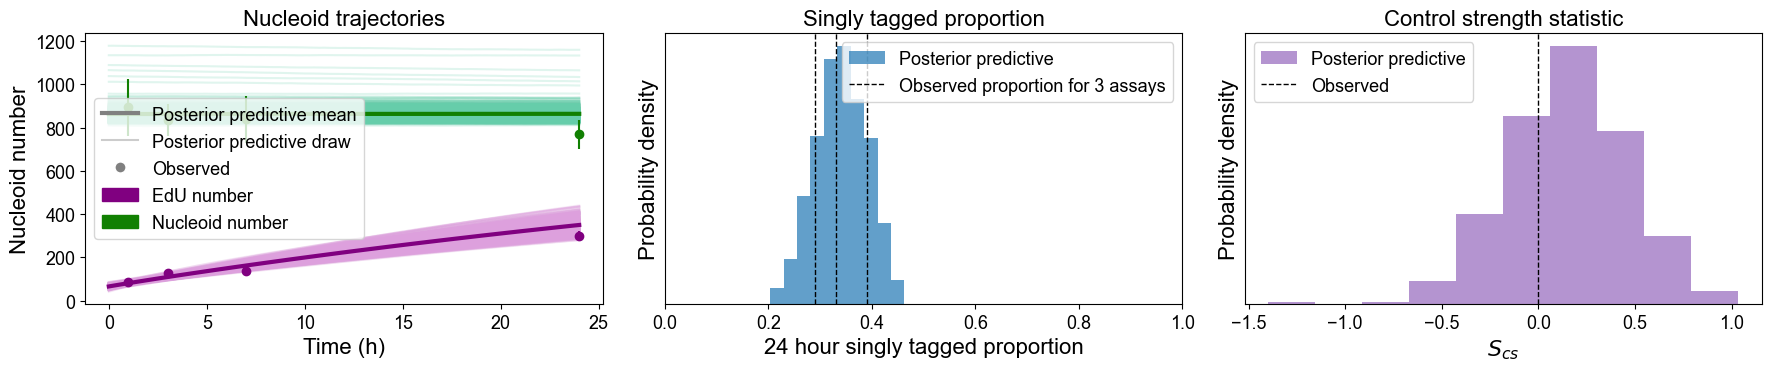

In [4]:
ABC_plot.single_posterior_predictive_pulse(nucleoid_trajectories, edu_trajectories, peak1, variance_statistics, mode = "validation")
plt.tight_layout()

Validation Chase Trajectories

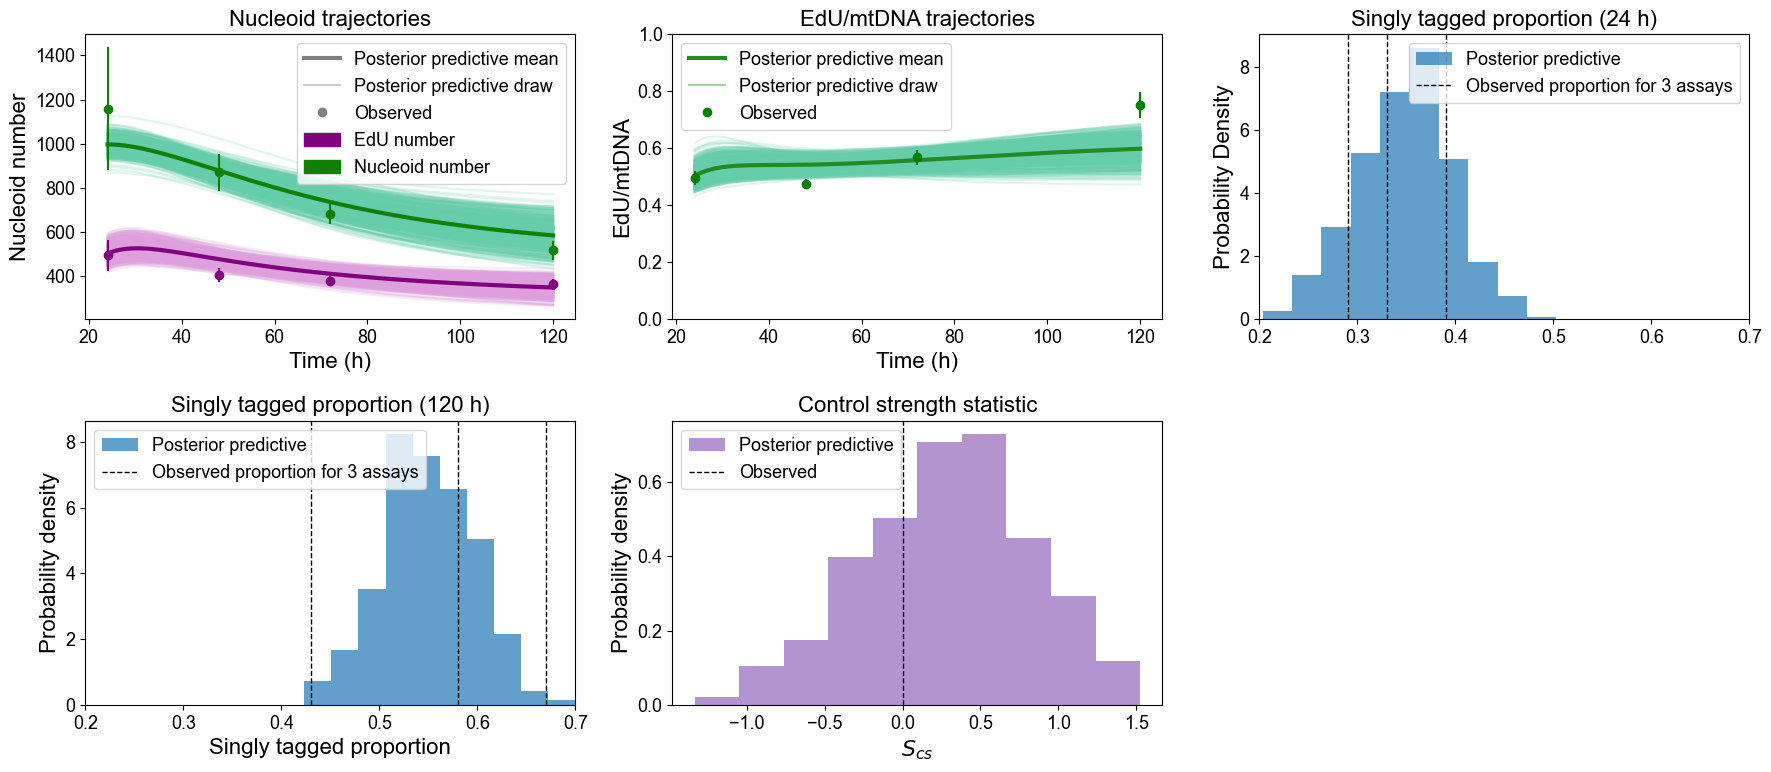

In [5]:
ABC_plot.single_posterior_predictive_chase(nucleoid_trajectories_chase, edu_trajectories_chase, edu_proportions_chase, peak1_0day_chase, peak1_4day_chase, variance_statistics_chase, mode = "validation")
plt.tight_layout()

The next section simulates the summary statistics for the validation set and the training set for each posterior sample and comutes its distance from the validation and training data respectively.

In [6]:
pulse_train = np.load("./data_preprocessing/validation_data/distance_metric_comparison/pulse_train.npy")
pulse_val = np.load("./data_preprocessing/validation_data/distance_metric_comparison/pulse_val.npy")
chase_train = np.load("./data_preprocessing/validation_data/distance_metric_comparison/chase_train.npy")
chase_val = np.load("./data_preprocessing/validation_data/distance_metric_comparison/chase_val.npy")

Uncomment this next codeblock if you wish to simulate the summary statistics from scratch

In [ ]:
# (pulse_train, _) = ABC.run_validation(number_sims = 500, inference_portion = "pulse", mode = "training")
# (pulse_val, _) = ABC.run_validation(number_sims = 500, inference_portion = "pulse", mode = "validation")
# (chase_train, _) = ABC.run_validation(number_sims = 500, inference_portion = "chase", mode = "training")
# (chase_val, _) = ABC.run_validation(number_sims = 500, inference_portion = "chase", mode = "validation")

In [7]:
pulse_val_distances = ABC.mahalanobis_distance(pulse_val, data.pulse_data_summary_statistics_val, np.diag(1/data.pulse_data_summary_statistics_variance))
pulse_train_distances = ABC.mahalanobis_distance(pulse_train, data.pulse_data_summary_statistics, np.diag(1/data.pulse_data_summary_statistics_variance))
chase_val_distances = ABC.mahalanobis_distance(chase_val, data.chase_data_summary_statistics_val, np.diag(1/data.chase_data_summary_statistics_variance))
chase_train_distances = ABC.mahalanobis_distance(chase_train, data.chase_data_summary_statistics, np.diag(1/data.chase_data_summary_statistics_variance))

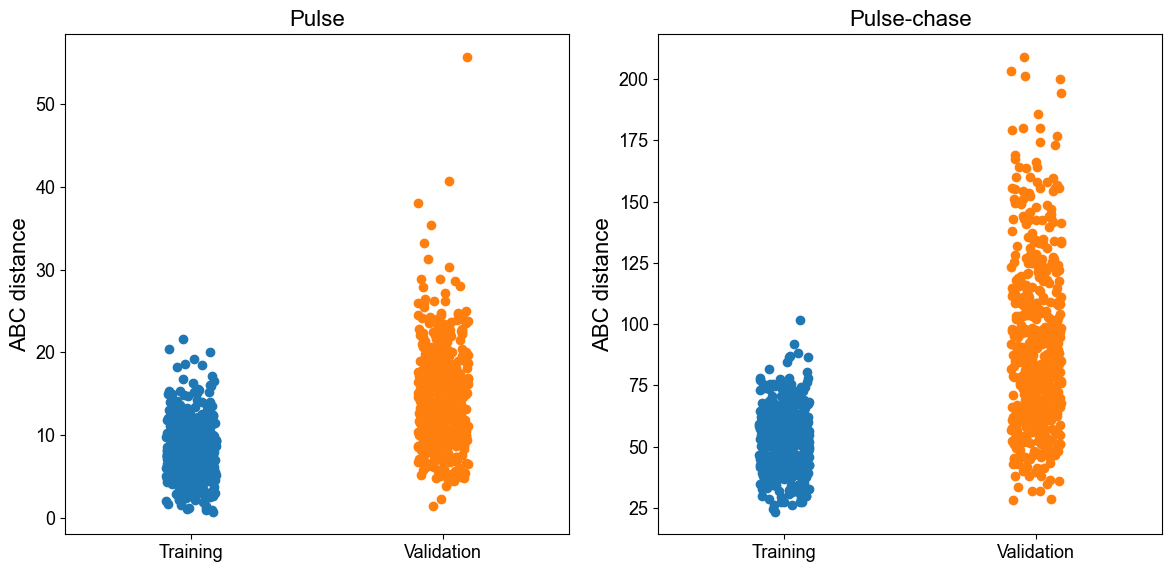

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter(np.random.uniform(-0.1,0.1,500), pulse_train_distances)
ax[0].scatter(np.random.uniform(0.9,1.1,500), pulse_val_distances)
ax[0].set_xlim(-0.5,1.5)
ax[0].set_xticks([0,1],["Training", "Validation"])
ax[0].set_ylabel("ABC distance")
ax[0].set_title("Pulse")

ax[1].scatter(np.random.uniform(-0.1,0.1,500), chase_train_distances)
ax[1].scatter(np.random.uniform(0.9,1.1,500), chase_val_distances)
ax[1].set_xlim(-0.5,1.5)
ax[1].set_xticks([0,1],["Training", "Validation"])
ax[1].set_ylabel("ABC distance")
ax[1].set_title("Pulse-chase")
plt.tight_layout()